In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

In [27]:
dataset = pd.read_csv('FuelConsumption.csv')

In [28]:
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [29]:
dataset = dataset[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [30]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (960, 4)
Unseen Data For Predictions: (107, 4)


In [31]:
exp_reg101 = setup(data = data, target = 'CO2EMISSIONS', session_id=123) 

,Description,Value
0,session_id,123
1,Target,CO2EMISSIONS
2,Original Data,"(960, 4)"
3,Missing Values,0
4,Numeric Features,2
5,Categorical Features,1
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(671, 9)"


In [32]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.2252,140.8002,11.0033,0.9636,0.0418,0.0128,0.2850
rf,Random Forest Regressor,4.3609,205.2118,12.9609,0.9472,0.0467,0.0164,0.3340
gbr,Gradient Boosting Regressor,6.1107,209.2819,13.4234,0.9455,0.0467,0.0227,0.0860
lightgbm,Light Gradient Boosting Machine,6.8069,238.2139,14.5009,0.9391,0.0516,0.0255,0.2090
knn,K Neighbors Regressor,6.3353,263.5333,14.7359,0.9335,0.0504,0.0234,0.0230
dt,Decision Tree Regressor,4.2635,290.4578,15.6929,0.9262,0.0567,0.0164,0.0180
ada,AdaBoost Regressor,13.2338,383.3298,19.1280,0.9039,0.0692,0.0506,0.0610
lr,Linear Regression,16.1649,509.4510,22.4577,0.8702,0.0829,0.0629,1.0590
lar,Least Angle Regression,16.1649,509.4509,22.4577,0.8702,0.0829,0.0629,0.0150
ridge,Ridge Regression,16.1620,511.1333,22.4996,0.8698,0.0830,0.0629,0.0270


In [33]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.9038,511.9076,22.6254,0.8430,0.0828,0.0614
1,18.0932,604.5360,24.5873,0.8746,0.0871,0.0687
2,16.9524,495.9248,22.2694,0.8815,0.0804,0.0636
3,15.3453,509.2094,22.5657,0.8949,0.0867,0.0626
4,16.4105,491.8367,22.1774,0.8676,0.0815,0.0635
5,15.4183,448.8274,21.1855,0.8925,0.0852,0.0636
6,16.4921,510.1852,22.5873,0.8839,0.0779,0.0623
7,12.7596,289.3663,17.0108,0.9219,0.0688,0.0525
8,17.3333,639.0514,25.2795,0.8064,0.0944,0.0693
9,16.9117,610.4883,24.7081,0.8320,0.0853,0.0619


In [34]:
tuned_ridge = tune_model(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.7280,502.2881,22.4118,0.8459,0.0813,0.0603
1,18.7470,647.4238,25.4445,0.8657,0.0895,0.0709
2,16.9247,501.3835,22.3916,0.8802,0.0804,0.0632
3,15.6996,524.7326,22.9070,0.8917,0.0872,0.0636
4,16.5266,498.0628,22.3173,0.8660,0.0818,0.0639
5,15.3805,454.2436,21.3130,0.8912,0.0848,0.0633
6,16.6158,514.7529,22.6882,0.8829,0.0783,0.0626
7,12.8803,298.2074,17.2687,0.9196,0.0706,0.0531
8,17.2239,653.3399,25.5605,0.8021,0.0951,0.0687
9,16.6086,602.4785,24.5454,0.8342,0.0844,0.0608


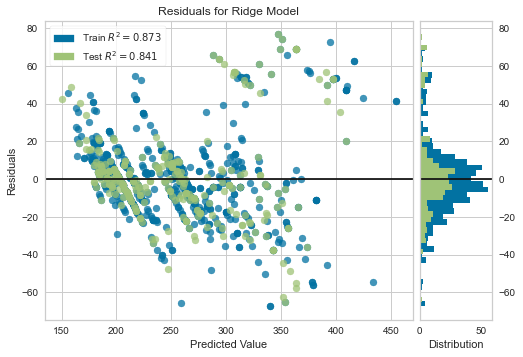

In [35]:
plot_model(tuned_ridge)

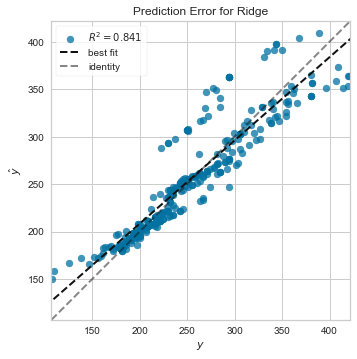

In [36]:
plot_model(tuned_ridge, plot = 'error')

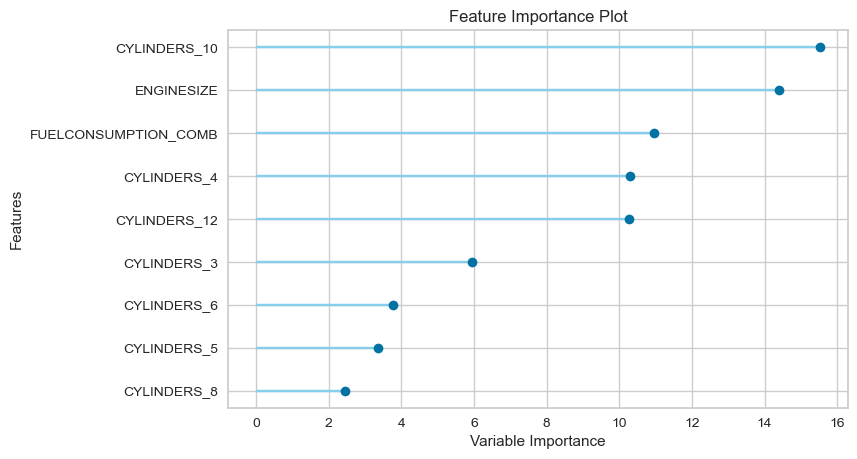

In [37]:
plot_model(tuned_ridge, plot='feature')

In [38]:
predict_model(tuned_ridge);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,16.6221,616.5195,24.8298,0.8405,0.0893,0.0641


In [39]:
final_ridge = finalize_model(tuned_ridge)

In [40]:
predict_model(final_ridge);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,16.7042,595.0335,24.3933,0.8461,0.0893,0.0648


In [41]:
unseen_predictions = predict_model(final_ridge, data=data_unseen)
unseen_predictions.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,Label
0,3.5,6,11.1,255,254.963409
1,3.5,6,10.0,230,243.836945
2,5.9,12,15.6,359,354.356323
3,4.7,8,15.4,354,321.262177
4,4.2,8,14.6,336,305.634735


In [42]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.CO2EMISSIONS, unseen_predictions.Label, 'R2')

0.8438

In [43]:
save_model(final_ridge, model_name = 'deployment_28042020')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='CO2EMISSIONS',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                 ('dummy', Dummify(target='CO2EMISSIONS')),
                 ('fix_perfect', Remove_100(target='CO2EMISSIONS')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
        